In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("dataset.csv")

df = df[['Date' ,'Time' ,'Latitude' ,'Longitude' ,'Depth' ,'Magnitude']]
df

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.2460,145.6160,131.60,6.0
1,01/04/1965,11:29:49,1.8630,127.3520,80.00,5.8
2,01/05/1965,18:05:58,-20.5790,-173.9720,20.00,6.2
3,01/08/1965,18:49:43,-59.0760,-23.5570,15.00,5.8
4,01/09/1965,13:32:50,11.9380,126.4270,15.00,5.8
...,...,...,...,...,...,...
23407,12/28/2016,8:22:12,38.3917,-118.8941,12.30,5.6
23408,12/28/2016,9:13:47,38.3777,-118.8957,8.80,5.5
23409,12/28/2016,12:38:51,36.9179,140.4262,10.00,5.9
23410,12/29/2016,22:30:19,-9.0283,118.6639,79.00,6.3


In [3]:
import datetime

current_datetime = datetime.datetime.now()
print("Now is : ", current_datetime)

timestamp = current_datetime.timestamp()

print("Time stamp (seconds): ", timestamp)

Now is :  2024-01-15 11:52:00.544468
Time stamp (seconds):  1705308720.544468


In [4]:
import datetime

timestamps = []
for _, row in df.iterrows():
    try:
        d = row['Date']
        t = row['Time']
        
        full_date_string= d + " " + t
        
        full_date = datetime.datetime.strptime(full_date_string, '%m/%d/%Y %H:%M:%S')
        
        timestamp = full_date.timestamp()
        
        timestamps.append(timestamp)
        
    except Exception:
        timestamps.append('ValueError')

In [5]:
df['Timestamp'] = timestamps

df = df.drop(['Date', 'Time'], axis=1)

df = df[df.Timestamp != 'ValueError']

df['Timestamp'] = df['Timestamp'].astype(float)

df.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
1457,24.185,102.543,11.3,7.1,309641.0
1458,23.984,102.732,15.0,5.9,377350.0
1459,-9.583,151.493,15.0,6.3,441354.0
1460,15.785,-59.808,36.7,6.0,536174.0
1461,-34.850,178.782,199.4,6.8,655961.0


In [6]:
!pip install basemap

  Obtaining dependency information for basemap from https://files.pythonhosted.org/packages/12/e8/9e09297a082daa3138c16c1f3c97346e6b79bae612ebb2c2c66ebe63ba93/basemap-1.4.0-cp311-cp311-win_amd64.whl.metadata
  Using cached basemap_data-1.3.2-py2.py3-none-any.whl (30.5 MB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
  Obtaining dependency information for pyproj<3.7.0,>=1.9.3 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/507.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/507.1 kB ? eta -:--:--
    --------------------------------------- 10.2/507.1 kB ? eta -:--:--
    --------------------------------------- 10.2/507.1 kB ? eta -:--:--
   -- ------------------------------------ 30.7/507.1 kB 187.9 kB/s eta 0:00:03
   --- ----------------------------------- 41.0/507.1 kB 196.9 kB/s eta 0:00:03
   --

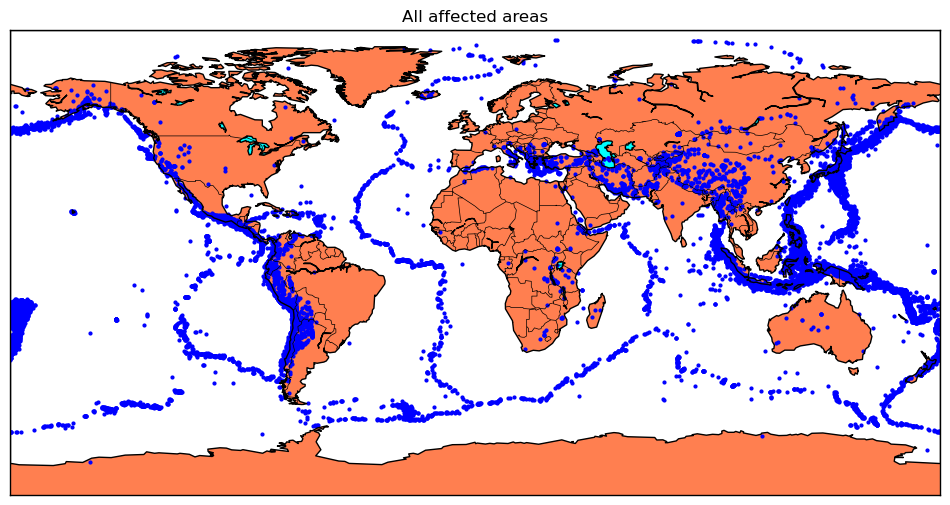

In [7]:
from mpl_toolkits.basemap import Basemap

m = Basemap()

longitudes = df["Longitude"].tolist()

latitudes = df["Latitude"].tolist()

x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))

plt.title("All affected areas")

m.plot(x, y, "o", markersize = 2, color = 'blue')

m.drawcoastlines()

m.fillcontinents(color='coral',lake_color='aqua')

m.drawmapboundary()

m.drawcountries()

plt.show()

In [9]:
X = df[['Latitude', 'Longitude', 'Timestamp']].values

y = df[['Depth', 'Magnitude']].values

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='linear'))

In [13]:
model.compile(optimizer='adam', loss='mean_absolute_error')

In [14]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
515/515 [==============================] - 1s 1ms/step - loss: 29.4019 - val_loss: 27.4230
Epoch 2/20
515/515 [==============================] - 1s 1ms/step - loss: 27.1141 - val_loss: 27.1794
Epoch 3/20
515/515 [==============================] - 1s 1ms/step - loss: 26.8781 - val_loss: 27.1012
Epoch 4/20
515/515 [==============================] - 1s 1ms/step - loss: 26.7243 - val_loss: 27.0630
Epoch 5/20
515/515 [==============================] - 1s 1ms/step - loss: 26.6810 - val_loss: 27.0409
Epoch 6/20
515/515 [==============================] - 1s 1ms/step - loss: 26.7015 - val_loss: 27.0314
Epoch 7/20
515/515 [==============================] - 1s 1ms/step - loss: 26.6436 - val_loss: 27.0169
Epoch 8/20
515/515 [==============================] - 1s 1ms/step - loss: 26.6512 - val_loss: 27.0623
Epoch 9/20
515/515 [==============================] - 1s 1ms/step - loss: 26.6409 - val_loss: 27.0281
Epoch 10/20
515/515 [==============================] - 1s 1ms/step - loss: 26.6487

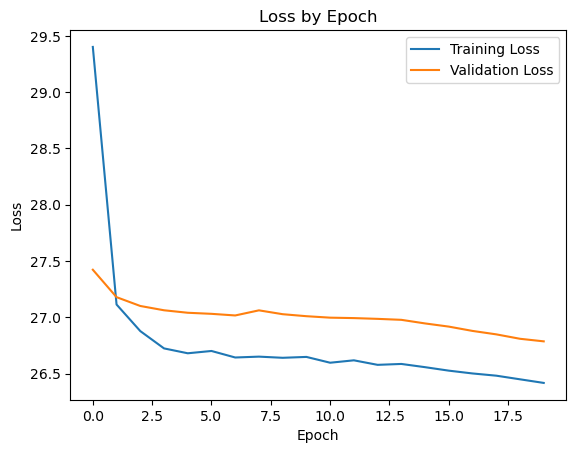

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss by Epoch')
plt.legend()
plt.show()

In [16]:
model.save('earthquacke_model.keras')

import pickle
scaler_path = 'earthquacke_scalar'

with open(scaler_path, 'wb') as file:
    pickle.dump(scaler, file)

In [17]:
latitude = 19
longitude = 145

current_datetime = datetime.datetime.now()

timestamp = current_datetime.timestamp()

from keras.models import load_model

model = load_model('earthquacke_model.keras')

scaler_path = 'earthquacke_scalar'
with open(scaler_path, 'rb') as file:
    scaler = pickle.load(file)

new_data = np.array([[latitude, longitude, timestamp]])

scaled_data = scaler.transform(new_data)

predictions = model.predict(scaled_data)

Depth = predictions[0][0]
Magnitude = predictions[0][1]
print("Predicted Depth: ", Depth)
print("Predicted Magnitude: ", Magnitude)

1/1 [==============================] - 0s 73ms/step
Predicted Depth:  27.66851
Predicted Magnitude:  5.721498
